In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

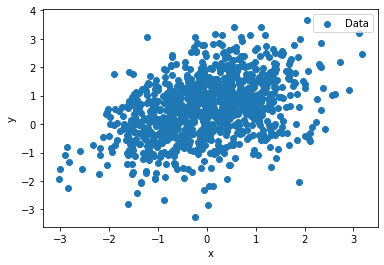

In [77]:
df = pd.read_csv('data/ex.csv')

dataset = df.copy()

X = dataset.values
x = dataset['x'].values
y = dataset['y'].values

def plot_dataset(x, y):
  plt.scatter(x, y, label='Data')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

plot_dataset(x, y)

### PCA

Principal component analysis (PCA). [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

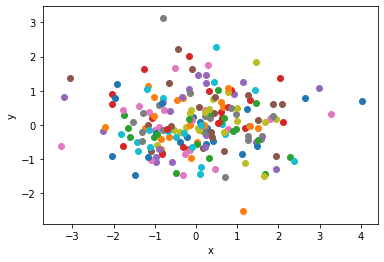

Components:
[[ 0.63811623  0.76994004]
 [ 0.76994004 -0.63811623]]
Explained Variance:
[1.52008829 0.63938057]
Explained Variance Ratio:
[0.70391767 0.29608233]
Sum of Exmplained Variance Ratio:
1.0


In [78]:
# PCA Reduction
pca = PCA(n_components=2, copy=True)
pca.fit(X)
transformed_X = pca.transform(X)

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.20)

# Plotting
for index, point in enumerate(x_test):
    plt.scatter(point[0], point[1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f"Components:\n{pca.components_}")
print(f"Explained Variance:\n{pca.explained_variance_}")
print(f"Explained Variance Ratio:\n{pca.explained_variance_ratio_}")
print(f"Sum of Exmplained Variance Ratio:\n{sum(pca.explained_variance_ratio_)}")

### TSNE 

t-distributed Stochastic Neighbor Embedding. [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples. For more tips see Laurens van der Maaten’s FAQ [2].

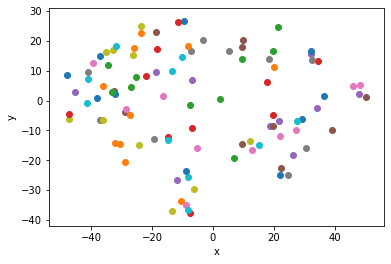

In [79]:
# tSNE Reduction
tsne = TSNE(n_components=2, n_iter=2000)
transformed_X = tsne.fit_transform(X)

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.10)

# Plotting
for index, point in enumerate(x_test):
    plt.scatter(point[0], point[1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [80]:
print(f"Iterations: {tsne.n_iter_}")
print(f"Kullback-Leibler divergence: {tsne.kl_divergence_}")

Iterations: 1999
Kullback-Leibler divergence: 0.486895889043808
